# "Manuelle" Lösung

Die Iris-Datenbank stellt keine besonderen Heausforderungen an die KI: Sie ist klein, hat nur wenige Features und nur wenige Beispieldaten. Wir konnten die Daten einfach visualisieren und in den Diagrammen schon eine Struktur (ein Muster) erkennen.

Bevor wir verschiedene Verfahren demonstrieren, versuchen wir uns selbst an den Daten.

### Laden der Iris-Datenbank

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [16]:
iris = pd.read_csv('iris.csv')
iris.head()

,Sepal Länge (cm),Sepal Breite (cm),Petal Länge (cm),Petal Breite (cm),Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Die Namen sind natürlich Strings; wir brauchen aber Interger-Werte. Wir legen eine neue Spalte `CName` für die mit 0, 1, 2 codierten Namen an:

In [18]:
iris['CName'] = pd.factorize(iris['Name'])[0]
iris

,Sepal Länge (cm),Sepal Breite (cm),Petal Länge (cm),Petal Breite (cm),Name,CName
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,2
146,6.3,2.5,5.0,1.9,Iris-virginica,2
147,6.5,3.0,5.2,2.0,Iris-virginica,2
148,6.2,3.4,5.4,2.3,Iris-virginica,2


Wir teilen nun die Daten in die Features __X__ und die Label __y__ auf (zusätzlich merken wir uns die Namen)

In [21]:
X, y, namen = iris.iloc[:, :-2].values, iris.iloc[:, -1].values, iris.iloc[:, -2].values

### Visualisierung mit matplotlib

Sehen wir uns die Daten einmal genauer an. Da die Eingabedaten vierdimensional sind, tragen wir die Daten für Sepal und Petal getrennt auf.

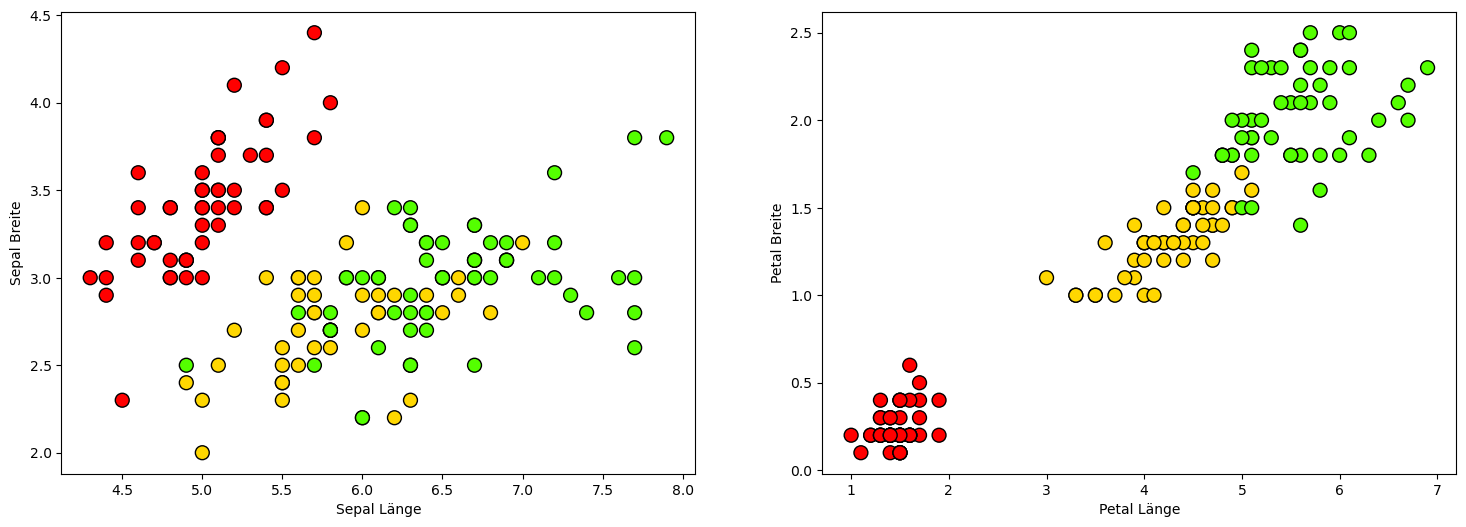

In [60]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# First scatter plot
axes[0].scatter(X[:, 0], X[:, 1], c=y, cmap='prism', edgecolor='k', s=100)
axes[0].set_xlabel('Sepal Länge')
axes[0].set_ylabel('Sepal Breite')

axes[1].scatter(X[:, 2], X[:, 3], c=y, cmap='prism', edgecolor='k', s=100)
axes[1].set_xlabel('Petal Länge')
axes[1].set_ylabel('Petal Breite');



Im rechten Bild zerfallen die Daten relativ deutlich in drei Bereiche. Die Daten der Iris setosa liegen völlig isoliert links unten, und die beiden anderen überlappen sich nur in einem kleinen Bereich. Wir können also relativ sicher Iris setosa anhand zweier Daten bestimmen. Im Überlappungsbereich von Iris virginica und Iris verticolor könnten wir mit Informationen aus den Sepal-Daten wahrscheinlich ebenfalls ein gute Wahl treffen; ansonsten wählt man zufällig. Implementieren wir einmal diese Lösung...

### Implementierung einer "heuristischen" Lösung

In [46]:
import random

def heuristisch(x):
    pl,pb = x[2],x[3]

    if pl < 2.5 and pb < 0.9:
        return 'Iris-setosa'
    
    if pl < 4.7 or pb < 1.3:
        return 'Iris-versicolor'  
    
    if pl > 4.7 or pb > 1.3:
        return 'Iris-virginica' 
    
    return 'Iris-virginica'  if random.random < 0.5 else 'Iris-versicolor'


In [59]:
import numpy as np

for k in range(50,60):
    print(heuristisch(X[k]) == namen[k])

testresult = [heuristisch(x) == y for x, n in zip(X,namen)]
score = np.count_nonzero(testresult) / 150.
print(np.count_nonzero(testresult))
print(f'Genauigkeit {score:0.1%}')
    

False
True
False
True
True
True
False
True
True
True
0
Genauigkeit 0.0%


### Diskussion

Wir haben also ohne große Mühe durch Betrachtung der Daten eine Funktion gefunden, die mit über 90 % Genauigkeit die richtige Pflanzenart bestimmt. Dabei haben wir sogar noch die Hälfte der verfügbaren Daten unbeachtet gelassen. Dies war allein durch die Visualisierung möglich. 

Der **Iris-Datensatz** gern als Beispiel für verschiedene Verfahren verwendet, etwa für **Clusterung durch K-Means**. 